In [25]:

import numpy as np
import matplotlib.pyplot as plt


In [26]:
# SSR Minimization Method
def best_fit_ssr(x, y):
    min_SSR = float('inf')
    best_slope = None
    best_intercept = None
    
    # Brute-force search for best slope and intercept
    for slope in np.arange(0, 5, 0.01):
        for intercept in np.arange(min(y), max(y), 0.1):
            y_pred = slope * x + intercept
            residuals = y - y_pred
            SSR = np.sum(residuals ** 2)
            if SSR < min_SSR:
                min_SSR = SSR
                best_slope = slope
                best_intercept = intercept
                
    # Calculate R-squared
    y_pred_best = best_slope * x + best_intercept
    y_mean = np.mean(y)
    SS_mean = np.sum((y - y_mean) ** 2)
    SS_fit = np.sum((y - y_pred_best) ** 2)
    R_squared = (SS_mean - SS_fit) / SS_mean

    return best_slope, best_intercept, R_squared


In [27]:
# Gradient Descent Method
def gradient_descent(x, y, alpha=0.1, iterations=1000):
    m = 0
    b = 0
    cost_history = []  # To store cost (MSE) at each iteration

    for i in range(iterations):
        y_pred = m * x + b
        residuals = y - y_pred
        m_gradient = -2 * np.sum(x * residuals) / len(x)
        b_gradient = -2 * np.sum(residuals) / len(x)
        m -= alpha * m_gradient
        b -= alpha * b_gradient
        
        cost = np.mean(residuals ** 2)
        cost_history.append(cost)

    return m, b, cost_history


In [28]:
# Example usage with a dataset:
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)



Best slope: 1.94, Best intercept: 0.028046575476919605, R-squared: 0.9663802436247392


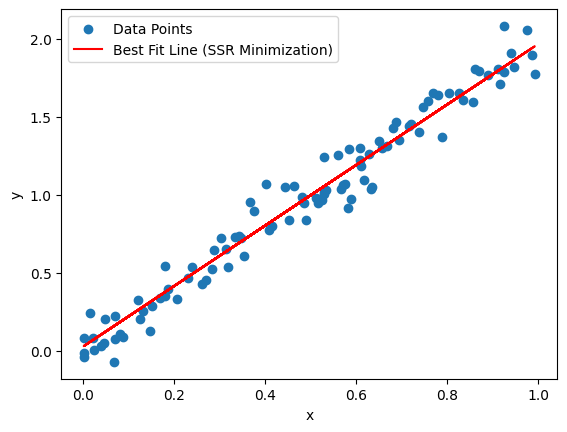

In [29]:
# Using SSR Minimization
best_slope, best_intercept, R_squared = best_fit_ssr(x, y)
print(f"Best slope: {best_slope}, Best intercept: {best_intercept}, R-squared: {R_squared}")

# Plotting the results
plt.scatter(x, y, label='Data Points')
plt.plot(x, best_slope * x + best_intercept, color='red', label='Best Fit Line (SSR Minimization)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Learned slope: 1.9738215807883035, Learned intercept: 0.0065231839753989275


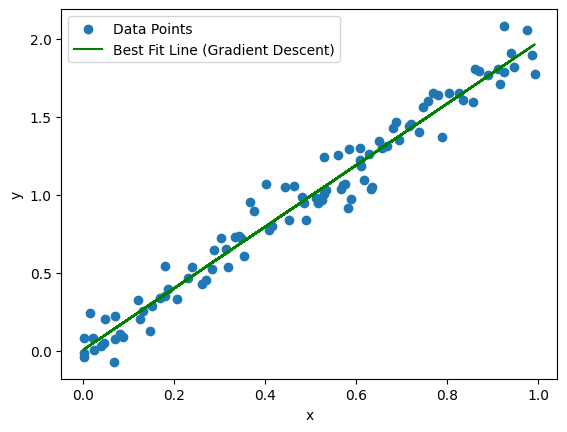

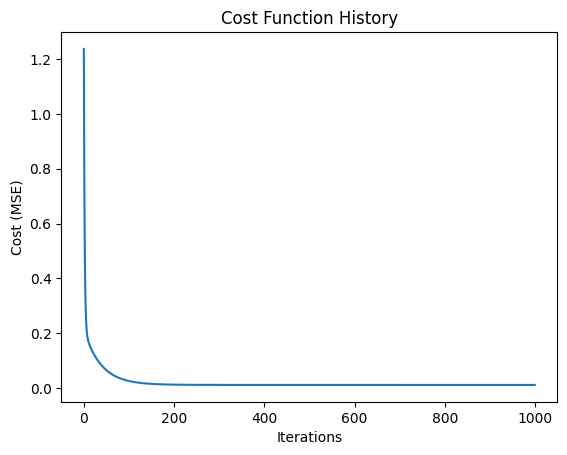

In [30]:
# Using Gradient Descent
m, b, cost_history = gradient_descent(x, y, alpha=0.1, iterations=1000)
print(f"Learned slope: {m}, Learned intercept: {b}")

# Plotting the results
plt.scatter(x, y, label='Data Points')
plt.plot(x, m * x + b, color='green', label='Best Fit Line (Gradient Descent)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plotting cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function History')
plt.show()
